# Processing of Sold Products Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import Processing_of_sold_products dataframe
Processing_of_sold_products=pd.read_csv('Processing_of_sold_products.csv')

In [2]:
Processing_of_sold_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                628 non-null    object 
 1   account_id                  628 non-null    int64  
 2   Year                        628 non-null    int64  
 3   incorporated_country        628 non-null    object 
 4   Primary activity            628 non-null    object 
 5   Primary sector              628 non-null    object 
 6   Market_Cap_USD              556 non-null    float64
 7   Third_party_verification    628 non-null    object 
 8   Revenue_USD                 562 non-null    float64
 9   ebitda_USD                  562 non-null    float64
 10  grossProfit_USD             562 non-null    float64
 11  netIncome_USD               562 non-null    float64
 12  cashAndCashEquivalents_USD  562 non-null    float64
 13  shortTermInvestments_USD    562 non

In [3]:
Processing_of_sold_products.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,99000000.0,1.248000e+10,8.810000e+09,171000000.0,4.344000e+09,3.670000e+09,Processing of sold products,110596.00,380471.81,4072324
1,CNH Industrial NV,49607,2018,United Kingdom,"Agriculture, construction & mining machinery",Powered machinery,1.231232e+10,Third-party verification or assurance process ...,2.970600e+10,2.339000e+09,...,526000000.0,4.610000e+10,4.100200e+10,526000000.0,2.444500e+10,5.098000e+09,Processing of sold products,396435.00,310663.50,4072324
2,Marks and Spencer Group plc,11328,2018,United Kingdom,"Supermarkets, food & drugstores",Convenience retail,4.877304e+09,Third-party verification or assurance process ...,1.317917e+10,1.089406e+09,...,36195000.0,1.124077e+10,8.104886e+09,209931000.0,5.443093e+09,3.135884e+09,Processing of sold products,1000.00,218956.75,4072324
3,Morgan Sindall Group plc,12392,2018,United Kingdom,Building sub-contractors,Construction,6.518885e+08,Third-party verification or assurance process ...,3.773805e+09,1.346200e+08,...,128905000.0,1.723517e+09,1.283335e+09,105156000.0,7.251700e+07,4.401820e+08,Processing of sold products,10000.00,20893.25,4072324
4,Travis Perkins,19376,2018,United Kingdom,"Dealers, wholesalers & distributors","Trading, wholesale, distribution, rental & lea...",3.382624e+09,No third-party verification or assurance,8.560435e+09,7.391400e+07,...,50292000.0,6.499352e+09,3.047873e+09,50292000.0,7.734300e+08,3.451479e+09,Processing of sold products,107785.69,152461.25,4072324


In [4]:
# Rename features
Processing_of_sold_products = Processing_of_sold_products.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
Processing_of_sold_products = Processing_of_sold_products.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

Processing_of_sold_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                628 non-null    object 
 1   account_id                  628 non-null    int64  
 2   Year                        628 non-null    int64  
 3   Countries                   628 non-null    object 
 4   Primary_activity            628 non-null    object 
 5   Primary_sector              628 non-null    object 
 6   Market_Cap_USD              556 non-null    float64
 7   Revenue_USD                 562 non-null    float64
 8   ebitda_USD                  562 non-null    float64
 9   grossProfit_USD             562 non-null    float64
 10  netIncome_USD               562 non-null    float64
 11  cashAndCashEquivalents_USD  562 non-null    float64
 12  shortTermInvestments_USD    562 non-null    float64
 13  longTermInvestments_USD     562 non

In [5]:
# Looking at missing data
print(Processing_of_sold_products.isnull().mean().sort_values(ascending=False).round(3) * 100)

Market_Cap_USD                11.5
cashAndCashEquivalents_USD    10.5
totalLiabilities_USD          10.5
totalEquity_USD               10.5
totalDebt_USD                 10.5
Revenue_USD                   10.5
ebitda_USD                    10.5
grossProfit_USD               10.5
netIncome_USD                 10.5
totalInvestments_USD          10.5
shortTermInvestments_USD      10.5
longTermInvestments_USD       10.5
totalAssets_USD               10.5
scope_1_2_emissions_amount     0.0
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


## Processing of Sold Products PCA Workflow

- Select numeric features (exclude IDs, names, year, categories, raw emissions).
- Apply signed log transform for normalization.
- Drop rows with missing data; retain valid indices.
- Standardize features, fit PCA, and extract all principal components.
- Create DataFrame of PCs (`PC1`, `PC2`, ...) and append to original data for valid rows.
- Plot scree and cumulative explained variance.
- Print cumulative variance explained per PC.

**Output:**  
`Processing_of_sold_products_with_pcs` contains original data plus principal components for valid rows.

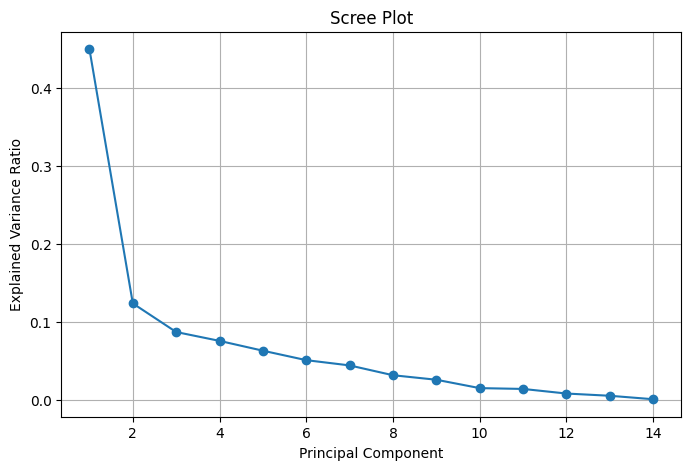

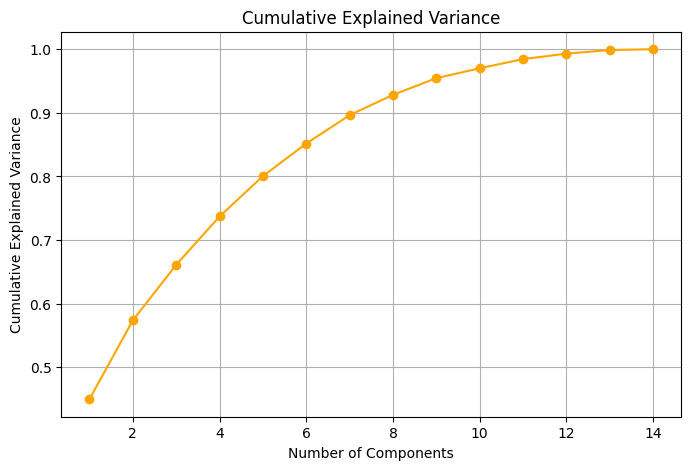

Cumulative variance explained by each additional principal component:
  PC1: 0.4496
  PC2: 0.5736
  PC3: 0.6609
  PC4: 0.7369
  PC5: 0.8004
  PC6: 0.8517
  PC7: 0.8963
  PC8: 0.9283
  PC9: 0.9545
  PC10: 0.9700
  PC11: 0.9845
  PC12: 0.9930
  PC13: 0.9987
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in Processing_of_sold_products.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(Processing_of_sold_products[col])
    and col != "Scope_3_emissions_amount"
]
X = Processing_of_sold_products[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
Processing_of_sold_products_with_pcs = Processing_of_sold_products.copy()
for col in pc_columns:
    Processing_of_sold_products_with_pcs[col] = np.nan  # initialize with NaN

Processing_of_sold_products_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# Processing_of_sold_products_with_pcs now contains the principal components for valid rows.

Eight pc's explains >90% of the variance in the data, five pc's explains >80% of the variance and 3 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate 8, 5 and 3 pc's performance on HLM models.

## Processing of Sold Products PCA Features & Train/Test Split

- Select numeric columns (excluding IDs, names, year, categories, raw emissions).
- Apply signed log transform for normalization.
- Drop rows with missing values; keep account_id and Year for valid indices.
- Standardize features, fit PCA for **8** (`PC8_*`), **5** (`PC5_*`), and **3** (`PC3_*`) components.
- Append all principal components to the original DataFrame.
- Add signed log-transformed target variable.
- Optionally, rename columns for consistency.
- **Split data:**  
  - `train_df`: years 2018–2022  
  - `test_df`: year 2023  
  - Test set includes only companies present in training.

**Output:**  
`Processing_of_sold_products_pca` has original data plus PC8, PC5, PC3 features and transformed target.  
`train_df`, `test_df` are ready for modeling/evaluation.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in Processing_of_sold_products.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(Processing_of_sold_products[col])
    and col != "Scope_3_emissions_amount"
]
X = Processing_of_sold_products[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = Processing_of_sold_products.loc[pca_data.index, "account_id"]
pca_data["Year"] = Processing_of_sold_products.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- PCA for 5 components ---
pca5 = PCA(n_components=5)
pcs5 = pca5.fit_transform(X_scaled)
pcs5_df = pd.DataFrame(pcs5, columns=[f"PC5_{i+1}" for i in range(5)], index=pca_data.index)

# --- PCA for 3 components ---
pca3 = PCA(n_components=3)
pcs3 = pca3.fit_transform(X_scaled)
pcs3_df = pd.DataFrame(pcs3, columns=[f"PC3_{i+1}" for i in range(3)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
Processing_of_sold_products_pca = Processing_of_sold_products.copy()
Processing_of_sold_products_pca = Processing_of_sold_products_pca.join(pcs8_df)
Processing_of_sold_products_pca = Processing_of_sold_products_pca.join(pcs5_df)
Processing_of_sold_products_pca = Processing_of_sold_products_pca.join(pcs3_df)

# --- Add transformed target and optionally other features ---
Processing_of_sold_products_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(Processing_of_sold_products_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
Processing_of_sold_products_pca = Processing_of_sold_products_pca.rename(columns={'incorporated_country': 'Countries',
                                                  'Primary activity': 'Primary_activity',
                                                  'Primary sector': 'Primary_sector'})

# --- Split train/test by company and year ---
train_df = Processing_of_sold_products_pca[Processing_of_sold_products_pca['Year'].between(2018, 2022)].copy()
test_df  = Processing_of_sold_products_pca[Processing_of_sold_products_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (491, 39)
Test shape: (113, 39)


In [8]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 490
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   491 non-null    object 
 1   account_id                     491 non-null    int64  
 2   Year                           491 non-null    int64  
 3   Countries                      491 non-null    object 
 4   Primary_activity               491 non-null    object 
 5   Primary_sector                 491 non-null    object 
 6   Market_Cap_USD                 433 non-null    float64
 7   Revenue_USD                    443 non-null    float64
 8   ebitda_USD                     443 non-null    float64
 9   grossProfit_USD                443 non-null    float64
 10  netIncome_USD                  443 non-null    float64
 11  cashAndCashEquivalents_USD     443 non-null    float64
 12  shortTermInvestments_USD       443 non-null    float64


## Processing of Sold Products HLM Model (PC8) - Train/Test Split

- Uses `train_df` and `test_df` created from the processing of sold products PCA workflow.
- Filters for required features: PC8 (`PC8_1` to `PC8_8`), target (signed-log Scope 3 emissions), and categorical columns.
- Ensures all categorical levels in test are present in train.
- Fits a hierarchical linear mixed-effects model (HLM) using only the PC8 features as predictors, plus categorical columns and year.
- Evaluates model performance on the test set and prints metrics.
- Returns a metrics dictionary for the PC8 model for downstream comparison.

**Output:**  
Performance metrics, coefficients, and visualizations for the HLM using PC8 principal components on train/test splits.

                                              Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   slog_Scope_3_emissions_amount
No. Observations:                   432                       Method:                               ML                           
No. Groups:                         127                       Scale:                                0.6696                       
Min. group size:                    1                         Log-Likelihood:                       -730.2072                    
Max. group size:                    5                         Converged:                            No                           
Mean group size:                    3.4                                                                                          
---------------------------------------------------------------------------------------------------------------------------------
      

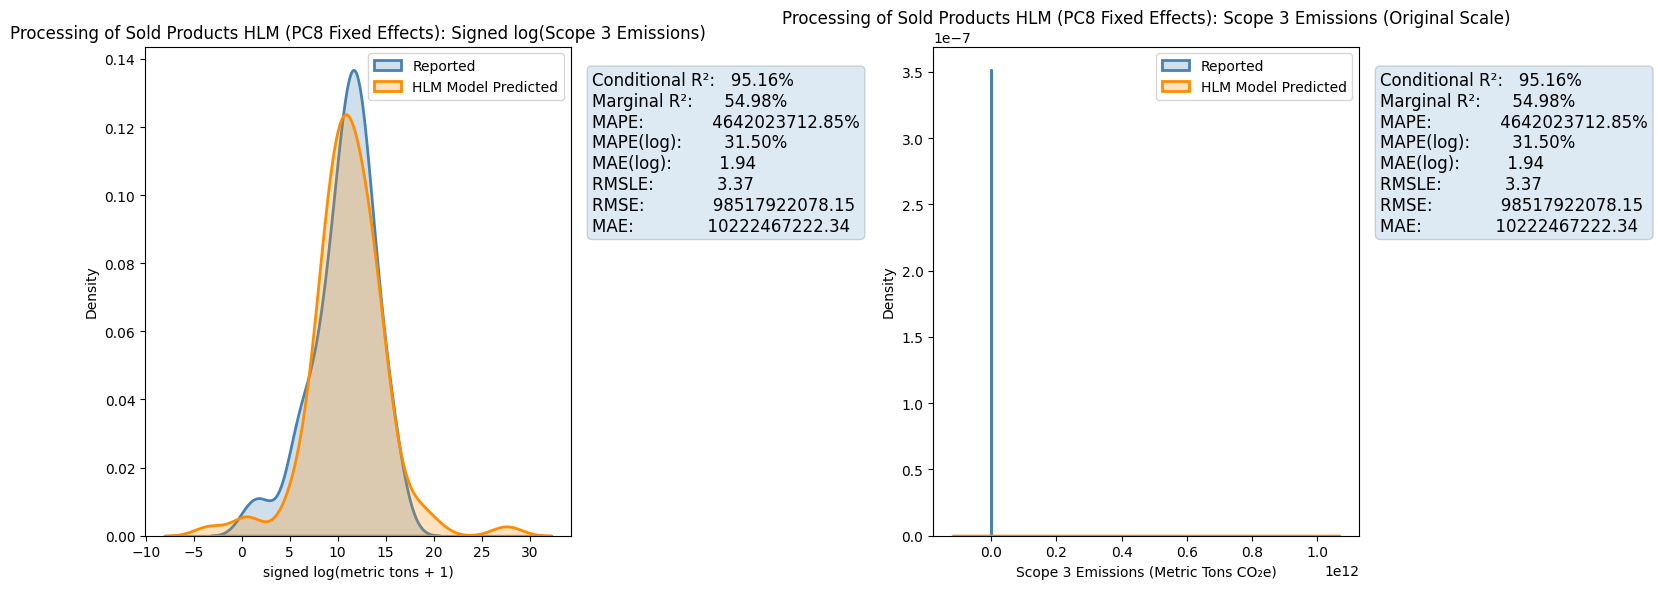

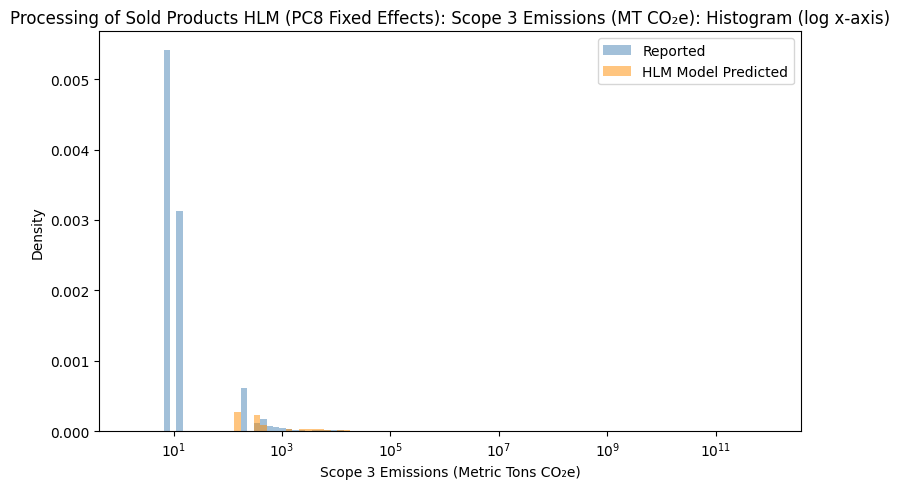

In [12]:
# --- HLM Model for Processing of Sold Products using PC8 features and train/test split ---

# Use train_df and test_df created from Processing_of_sold_products_pca
feature_cols_PC8 = [f'PC8_{i}' for i in range(1, 9)]
target_col_PC8 = 'slog_Scope_3_emissions_amount'
cat_cols_PC8 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC8 = feature_cols_PC8 + [target_col_PC8] + cat_cols_PC8

# Filter for required columns only
train_df_PC8 = train_df.dropna(subset=all_model_vars_PC8).copy()
test_df_PC8 = test_df.dropna(subset=all_model_vars_PC8).copy()

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC8[cat_col].unique())
    n_before = len(test_df_PC8)
    test_df_PC8 = test_df_PC8[test_df_PC8[cat_col].isin(train_cats)]
    n_after = len(test_df_PC8)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC8.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # Model formula (only PC8 features as predictors)
    fixed_effects = (
        ' + '.join(feature_cols_PC8) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC8} ~ {fixed_effects}'

    # Fit the mixed-effects model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        mdf_PC8 = md.fit(reml=False)
    print(mdf_PC8.summary())

    # Calculate conditional and marginal R²
    var_fixed = np.var(mdf_PC8.fittedvalues)
    var_resid = mdf_PC8.scale
    var_random = mdf_PC8.cov_re.iloc[0, 0] if mdf_PC8.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # Predict on test set
    test_df_PC8['predicted_log'] = mdf_PC8.predict(test_df_PC8)
    test_df_PC8['predicted'] = np.sign(test_df_PC8['predicted_log']) * (np.expm1(np.abs(test_df_PC8['predicted_log'])))

    # Metrics
    y_true_log = test_df_PC8[target_col_PC8]
    y_pred_log = test_df_PC8['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC8['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nProcessing of Sold Products HLM with PC8 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # Feature coefficients
    coef_df = pd.DataFrame({
        'coef': mdf_PC8.params,
        'pvalue': mdf_PC8.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Processing of Sold Products HLM (PC8 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Processing of Sold Products HLM (PC8 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Processing of Sold Products HLM (PC8 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # RETURN METRICS FOR SUMMARY TABLE
    PC8_model_metrics = {
        "Model": "HLM PC8",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC8),
        "# Obs (test)": len(test_df_PC8),
        "# Obs (train/test)": f"{len(train_df_PC8)}/{len(test_df_PC8)}"
    }

## Processing of Sold Products HLM Model (PC5) - Train/Test Split

- Uses `train_df` and `test_df` created from the processing of sold products PCA workflow.
- Filters for required features: PC5 (`PC5_1` to `PC5_5`), target (signed-log Scope 3 emissions), and categorical columns.
- Ensures all categorical levels in test are present in train.
- Fits a hierarchical linear mixed-effects model (HLM) using only the PC5 features as predictors, plus categorical columns and year.
- Evaluates model performance on the test set and prints metrics.
- Returns a metrics dictionary for the PC5 model for downstream comparison.

**Output:**  
Performance metrics, coefficients, and visualizations for the HLM using PC5 principal components on train/test splits.

                                      Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              slog_Scope_3_emissions_amount
No. Observations:              432                  Method:                          ML                           
No. Groups:                    127                  Scale:                           0.7982                       
Min. group size:               1                    Log-Likelihood:                  -683.6806                    
Max. group size:               5                    Converged:                       Yes                          
Mean group size:               3.4                                                                                
------------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
----

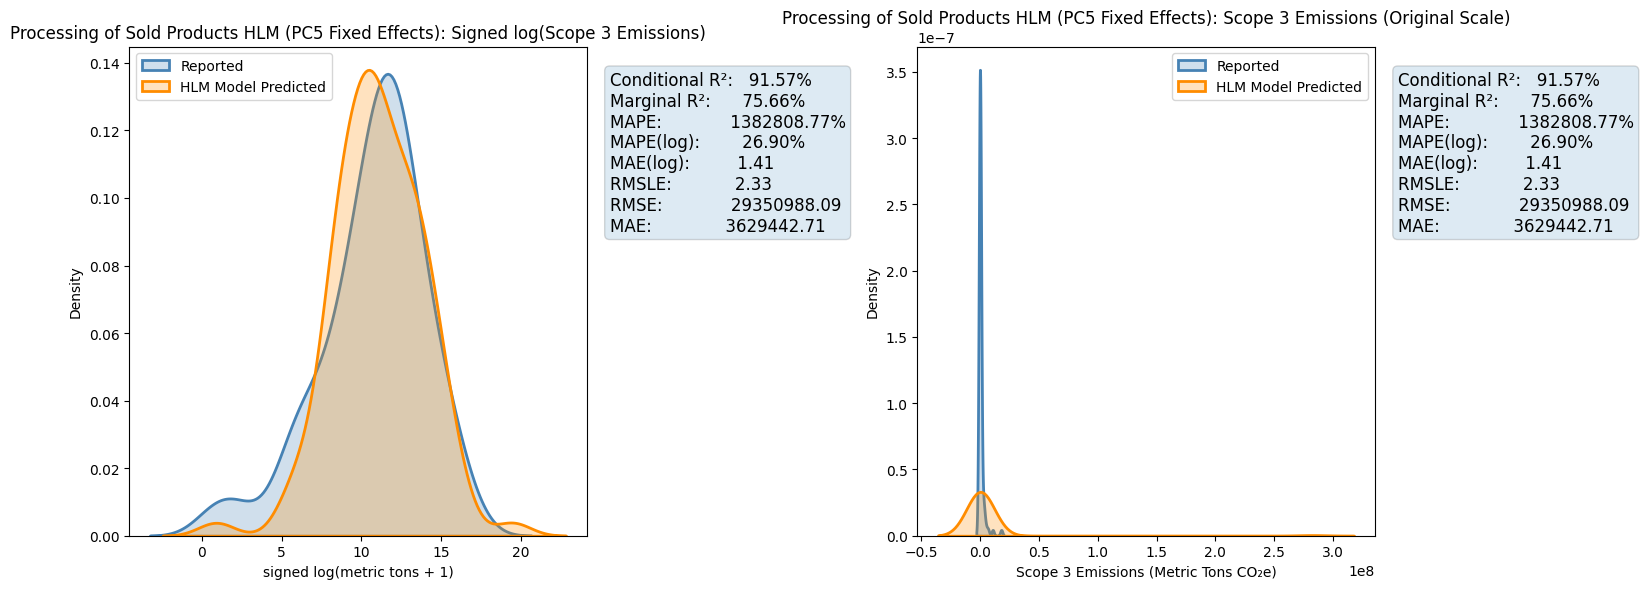

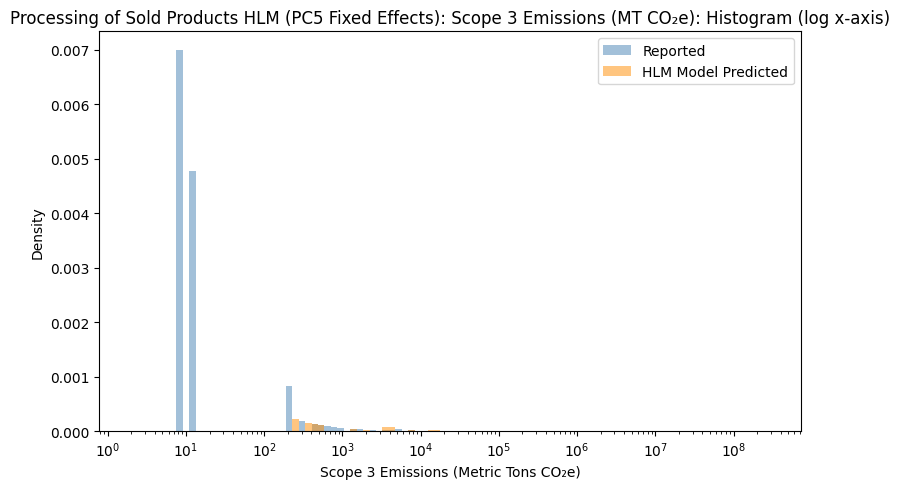

In [13]:
# --- HLM Model for Processing of Sold Products using PC5 features and train/test split ---

# Use train_df and test_df created from Processing_of_sold_products_pca
feature_cols_PC5 = [f'PC5_{i}' for i in range(1, 6)]
target_col_PC5 = 'slog_Scope_3_emissions_amount'
cat_cols_PC5 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC5 = feature_cols_PC5 + [target_col_PC5] + cat_cols_PC5

# Filter for required columns only
train_df_PC5 = train_df.dropna(subset=all_model_vars_PC5).copy()
test_df_PC5 = test_df.dropna(subset=all_model_vars_PC5).copy()

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC5[cat_col].unique())
    n_before = len(test_df_PC5)
    test_df_PC5 = test_df_PC5[test_df_PC5[cat_col].isin(train_cats)]
    n_after = len(test_df_PC5)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC5.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # Model formula (only PC5 features as predictors)
    fixed_effects = (
        ' + '.join(feature_cols_PC5) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC5} ~ {fixed_effects}'

    # Fit the mixed-effects model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC5, groups=train_df_PC5['account_id'])
        mdf_PC5 = md.fit(reml=False)
    print(mdf_PC5.summary())

    # Calculate conditional and marginal R²
    var_fixed = np.var(mdf_PC5.fittedvalues)
    var_resid = mdf_PC5.scale
    var_random = mdf_PC5.cov_re.iloc[0, 0] if mdf_PC5.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # Predict on test set
    test_df_PC5['predicted_log'] = mdf_PC5.predict(test_df_PC5)
    test_df_PC5['predicted'] = np.sign(test_df_PC5['predicted_log']) * (np.expm1(np.abs(test_df_PC5['predicted_log'])))

    # Metrics
    y_true_log = test_df_PC5[target_col_PC5]
    y_pred_log = test_df_PC5['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC5['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nProcessing of Sold Products HLM with PC5 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # Feature coefficients
    coef_df = pd.DataFrame({
        'coef': mdf_PC5.params,
        'pvalue': mdf_PC5.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Processing of Sold Products HLM (PC5 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Processing of Sold Products HLM (PC5 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Processing of Sold Products HLM (PC5 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # RETURN METRICS FOR SUMMARY TABLE
    PC5_model_metrics = {
        "Model": "HLM PC5",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC5),
        "# Obs (test)": len(test_df_PC5),
        "# Obs (train/test)": f"{len(train_df_PC5)}/{len(test_df_PC5)}"
    }

## Processing of Sold Products HLM Model (PC3) - Train/Test Split

- Uses `train_df` and `test_df` created from the processing of sold products PCA workflow.
- Filters for required features: PC3 (`PC3_1` to `PC3_3`), target (signed-log Scope 3 emissions), and categorical columns.
- Ensures all categorical levels in test are present in train.
- Fits a hierarchical linear mixed-effects model (HLM) using only the PC3 features as predictors, plus categorical columns and year.
- Evaluates model performance on the test set and prints metrics.
- Returns a metrics dictionary for the PC3 model for downstream comparison.

**Output:**  
Performance metrics, coefficients, and visualizations for the HLM using PC3 principal components on train/test splits.

                                                                Mixed Linear Model Regression Results
Model:                                           MixedLM                               Dependent Variable:                               slog_Scope_3_emissions_amount
No. Observations:                                432                                   Method:                                           ML                           
No. Groups:                                      127                                   Scale:                                            1.0182                       
Min. group size:                                 1                                     Log-Likelihood:                                   -705.6207                    
Max. group size:                                 5                                     Converged:                                        No                           
Mean group size:                                 3.4           

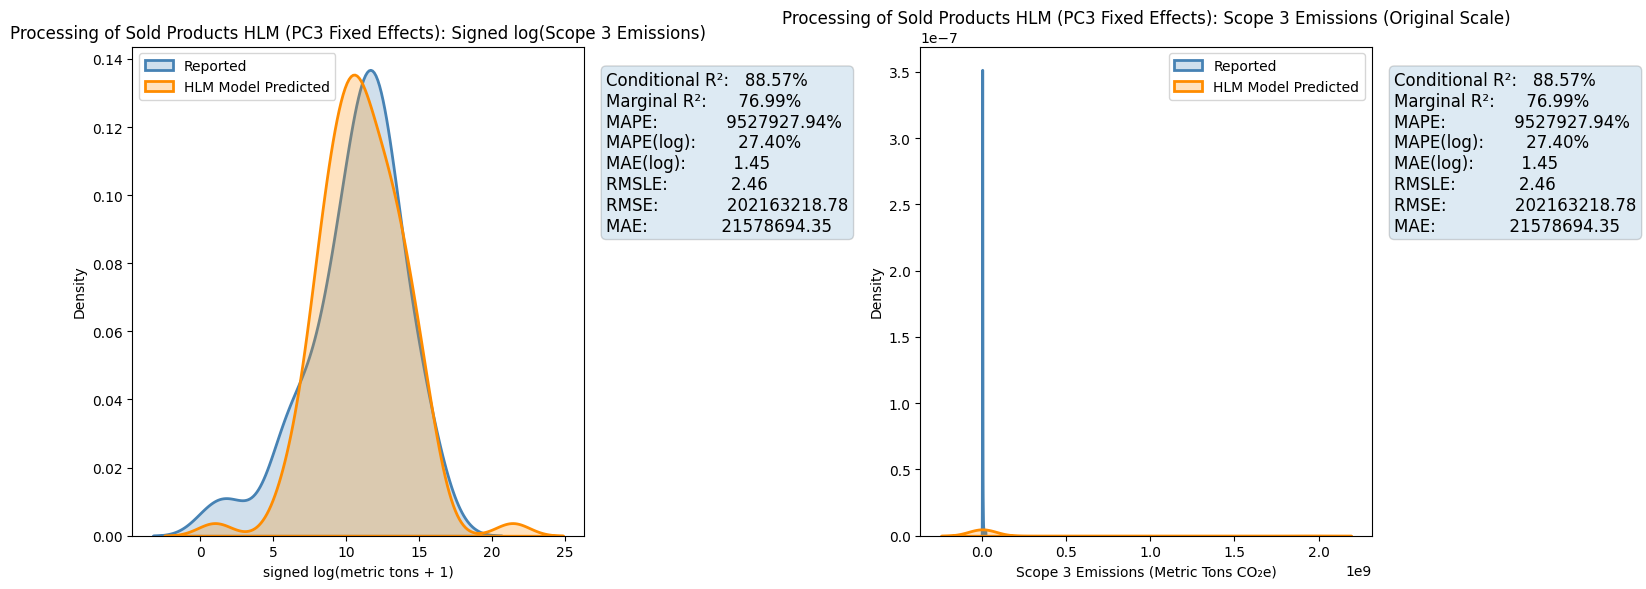

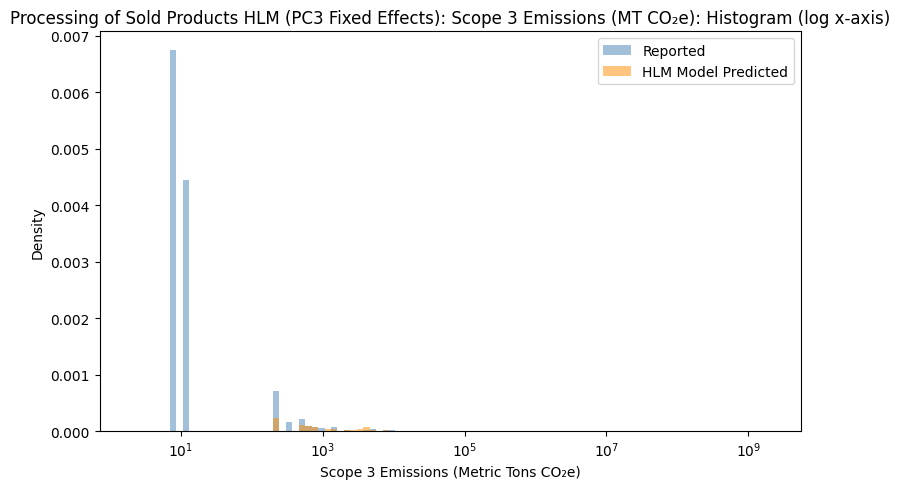

In [14]:
# --- HLM Model for Processing of Sold Products using PC3 features and train/test split ---

# Use train_df and test_df created from Processing_of_sold_products_pca
feature_cols_PC3 = [f'PC3_{i}' for i in range(1, 4)]
target_col_PC3 = 'slog_Scope_3_emissions_amount'
cat_cols_PC3 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC3 = feature_cols_PC3 + [target_col_PC3] + cat_cols_PC3

# Filter for required columns only
train_df_PC3 = train_df.dropna(subset=all_model_vars_PC3).copy()
test_df_PC3 = test_df.dropna(subset=all_model_vars_PC3).copy()

# Ensure all categorical levels in test are present in train
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC3[cat_col].unique())
    n_before = len(test_df_PC3)
    test_df_PC3 = test_df_PC3[test_df_PC3[cat_col].isin(train_cats)]
    n_after = len(test_df_PC3)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC3.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # Model formula (only PC3 features as predictors)
    fixed_effects = (
        ' + '.join(feature_cols_PC3) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC3} ~ {fixed_effects}'

    # Fit the mixed-effects model
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC3, groups=train_df_PC3['account_id'])
        mdf_PC3 = md.fit(reml=False)
    print(mdf_PC3.summary())

    # Calculate conditional and marginal R²
    var_fixed = np.var(mdf_PC3.fittedvalues)
    var_resid = mdf_PC3.scale
    var_random = mdf_PC3.cov_re.iloc[0, 0] if mdf_PC3.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # Predict on test set
    test_df_PC3['predicted_log'] = mdf_PC3.predict(test_df_PC3)
    test_df_PC3['predicted'] = np.sign(test_df_PC3['predicted_log']) * (np.expm1(np.abs(test_df_PC3['predicted_log'])))

    # Metrics
    y_true_log = test_df_PC3[target_col_PC3]
    y_pred_log = test_df_PC3['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_PC3['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nProcessing of Sold Products HLM with PC3 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # Feature coefficients
    coef_df = pd.DataFrame({
        'coef': mdf_PC3.params,
        'pvalue': mdf_PC3.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Processing of Sold Products HLM (PC3 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Processing of Sold Products HLM (PC3 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    valid_hist_mask = np.isfinite(y_true) & np.isfinite(y_pred) & (y_true > -1) & (y_pred > -1)
    y_true_hist = y_true[valid_hist_mask]
    y_pred_hist = y_pred[valid_hist_mask]
    if len(y_true_hist) > 0 and len(y_pred_hist) > 0:
        min_val = min(y_true_hist.min(), y_pred_hist.min())
        max_val = max(y_true_hist.max(), y_pred_hist.max())
        if (min_val + 1) > 0 and (max_val + 1) > 0:
            log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
            plt.figure(figsize=(8, 5))
            sns.histplot(y_true_hist, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
            sns.histplot(y_pred_hist, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
            plt.xscale("log")
            plt.title("Processing of Sold Products HLM (PC3 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
            plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
            plt.ylabel("Density")
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print("Error: min_val or max_val invalid for log scaling.")
    else:
        print("Error: No valid y_true/y_pred values for histogram.")

    # RETURN METRICS FOR SUMMARY TABLE
    PC3_model_metrics = {
        "Model": "HLM PC3",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_PC3),
        "# Obs (test)": len(test_df_PC3),
        "# Obs (train/test)": f"{len(train_df_PC3)}/{len(test_df_PC3)}"
    }

Now I'll look into hierarchical clustering on PC5 features to determine if that may add value to increasing prediction accuracy.<br>
PC5 was chosen due to convergence of HLM model.  

## Hierarchical Clustering on PC5 Features & Cluster Assignment

- Clustering is performed using the five PC5 components from `Processing_of_sold_products_pca`.
- Data is standardized before hierarchical clustering (Ward linkage).
- Optimal number of clusters is determined using the silhouette score (range: 2–30 clusters).
- Silhouette scores for all cluster counts are plotted.
- Assigns cluster labels to each valid row and appends these as the `'Cluster'` feature to the main DataFrame.
- Cluster membership counts are printed.
- Dendrogram is plotted for up to 100 samples for visual inspection.
- The resulting `'Cluster'` feature is appended to both `train_df` and `test_df` for downstream modeling and analysis.

**Output:**  
- `Processing_of_sold_products_pca_clusters` DataFrame with `'Cluster'` assignments  
- `train_df` and `test_df` now include the `'Cluster'` feature for each observation

Optimal number of clusters (highest silhouette score): 2


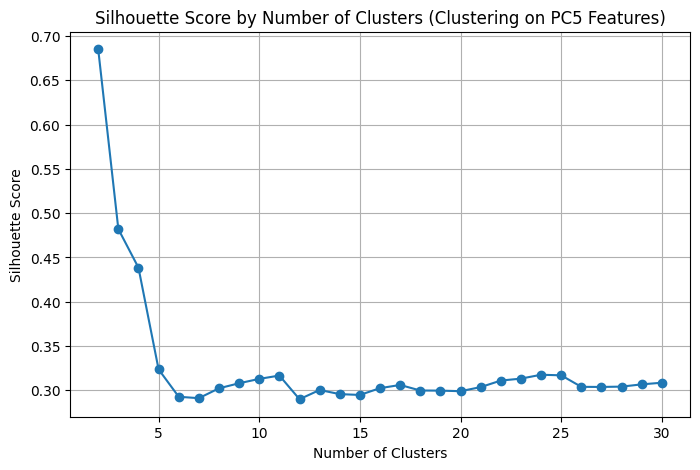

Number of observations in each cluster:
2    539
1     10
Name: count, dtype: int64


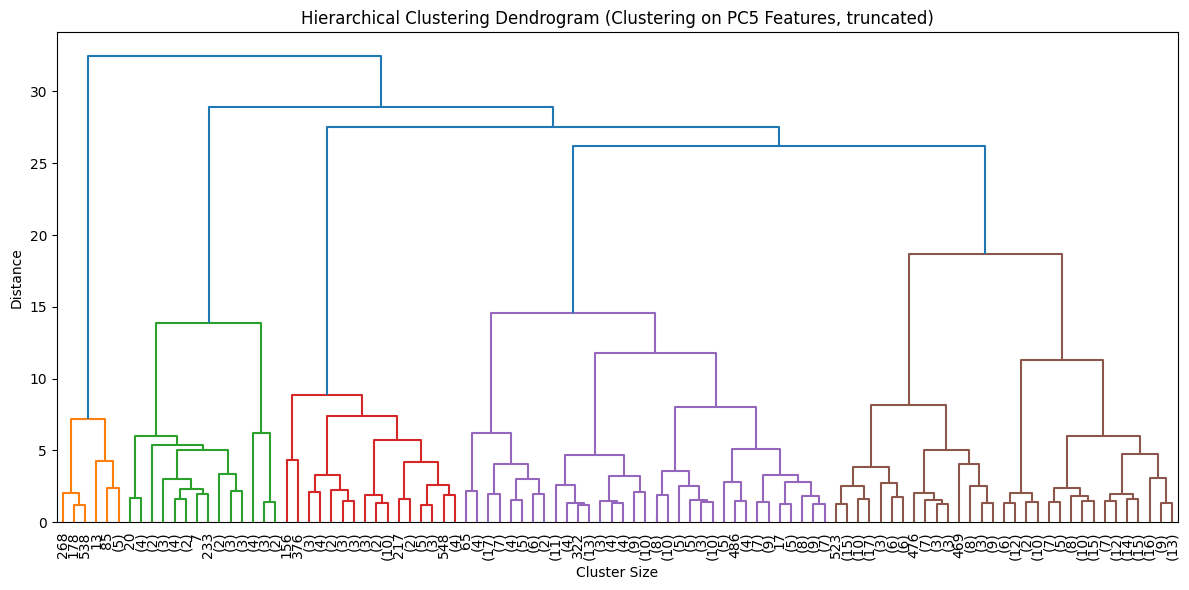

In [15]:
# --- STEP 1: Select PC5 PCA components for clustering ---
pc5_cols = [f'PC5_{i}' for i in range(1, 6)]
X_pc5 = Processing_of_sold_products_pca[pc5_cols].dropna()
clust_indices = X_pc5.index

# --- STEP 2: Standardize the PC5 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc5)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC5 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
Processing_of_sold_products_pca_clusters = Processing_of_sold_products_pca.copy()
Processing_of_sold_products_pca_clusters['Cluster'] = np.nan  # initialize with NaN
Processing_of_sold_products_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC5 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 7: Append 'Cluster' feature to train and test DataFrames ---
train_df = train_df.copy()
test_df = test_df.copy()
train_df['Cluster'] = Processing_of_sold_products_pca_clusters.loc[train_df.index, 'Cluster']
test_df['Cluster'] = Processing_of_sold_products_pca_clusters.loc[test_df.index, 'Cluster']

In [16]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 490
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   491 non-null    object 
 1   account_id                     491 non-null    int64  
 2   Year                           491 non-null    int64  
 3   Countries                      491 non-null    object 
 4   Primary_activity               491 non-null    object 
 5   Primary_sector                 491 non-null    object 
 6   Market_Cap_USD                 433 non-null    float64
 7   Revenue_USD                    443 non-null    float64
 8   ebitda_USD                     443 non-null    float64
 9   grossProfit_USD                443 non-null    float64
 10  netIncome_USD                  443 non-null    float64
 11  cashAndCashEquivalents_USD     443 non-null    float64
 12  shortTermInvestments_USD       443 non-null    float64


## Processing of Sold Products HLM Model (PC5 + Cluster) - Train/Test Split

- Uses train and test splits from `Processing_of_sold_products_pca_clusters` containing all PC features, the signed-log Scope 3 emissions target, and the appended `'Cluster'` feature.
- Filters predictors for PC5 (`PC5_1` to `PC5_5`) plus `'Cluster'` and all relevant categorical columns.
- Collapses rare levels in categorical features (including `'Cluster'`) to `'Other'` in both train and test sets.
- Drops constant and perfectly collinear predictors, with verbose reporting.
- Prints info on categorical levels and design matrix rank for diagnostics.
- Fits a hierarchical linear mixed-effects model (HLM) using PC5 and `'Cluster'` as fixed effects, plus categorical columns and year.
- Evaluates model performance on the test set and prints metrics, feature coefficients, and visualizations.
- Returns a metrics dictionary for downstream summary tables.

**Output:**  
Performance metrics, coefficients, and visualizations for the HLM using PC5 principal components and `'Cluster'` on train/test splits.

INFO: After collapsing, 'Countries' has 22 levels.
INFO: After collapsing, 'Primary_activity' has 47 levels.
INFO: After collapsing, 'Cluster' has 2 levels.

REPORT: DID NOT drop any PC5/Cluster columns for being constant or collinear.
INFO: Training categorical 'Countries' has 22 levels after collapse.
INFO: Training categorical 'Primary_activity' has 47 levels after collapse.
INFO: Training categorical 'Cluster' has 2 levels after collapse.
DEBUG: Fixed effects design matrix shape: (432, 75), rank: 74
                                                    Mixed Linear Model Regression Results
Model:                                   MixedLM                       Dependent Variable:                       slog_Scope_3_emissions_amount
No. Observations:                        432                           Method:                                   ML                           
No. Groups:                              127                           Scale:                                    0.

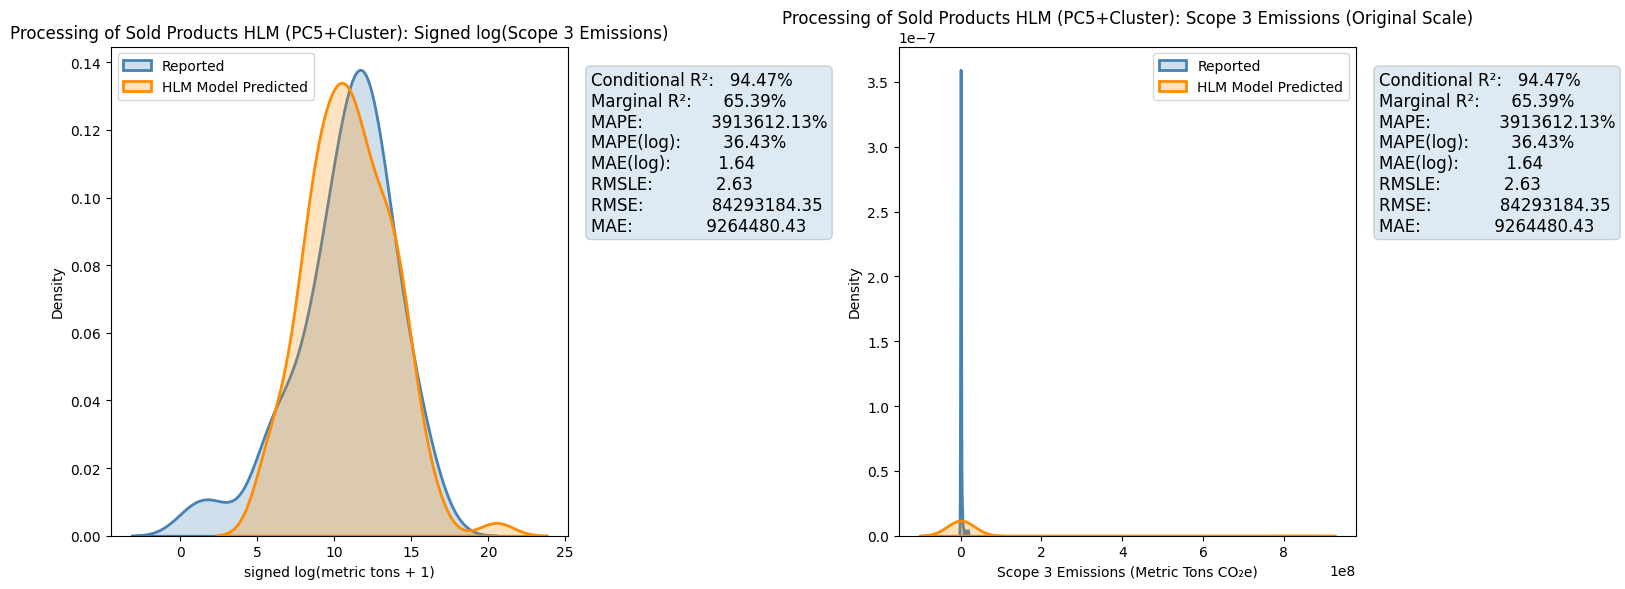

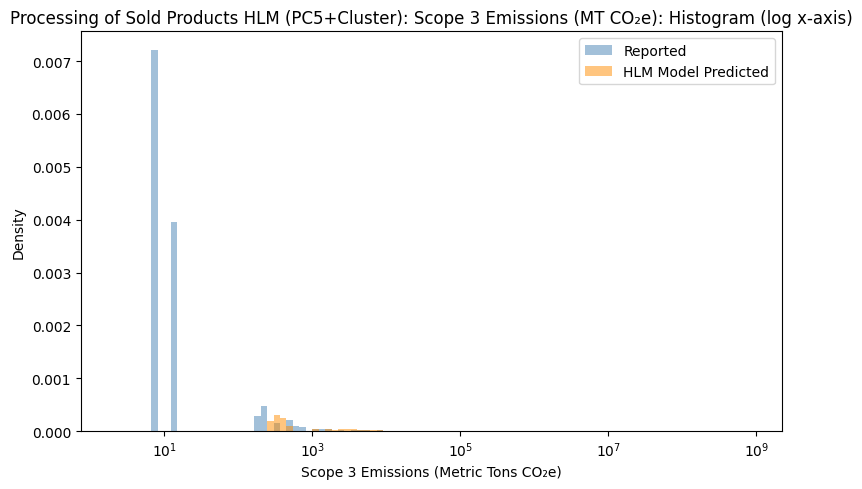

In [17]:
# --- PC5 + Cluster HLM ---

feature_cols_pc5_cluster = [f'PC5_{i}' for i in range(1, 6)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars = feature_cols_pc5_cluster + [target_col] + cat_cols

# --- Prepare Data ---
train_df_pc5 = Processing_of_sold_products_pca_clusters[
    (Processing_of_sold_products_pca_clusters['Year'] >= 2018) & (Processing_of_sold_products_pca_clusters['Year'] <= 2022)
].copy()
test_df_pc5 = Processing_of_sold_products_pca_clusters[
    (Processing_of_sold_products_pca_clusters['Year'] == 2023)
].copy()

valid_companies = set(train_df_pc5['account_id'].unique())
test_df_pc5 = test_df_pc5[test_df_pc5['account_id'].isin(valid_companies)].copy()

if 'cluster' in train_df_pc5.columns and 'Cluster' not in train_df_pc5.columns:
    train_df_pc5['Cluster'] = train_df_pc5['cluster']
if 'cluster' in test_df_pc5.columns and 'Cluster' not in test_df_pc5.columns:
    test_df_pc5['Cluster'] = test_df_pc5['cluster']

train_df_pc5c = train_df_pc5.dropna(subset=all_model_vars).copy()
test_df_pc5c  = test_df_pc5.dropna(subset=all_model_vars).copy()

# --- Collapse rare categorical levels (in both train and test!) ---
def collapse_rare_levels(train, test, cat, min_count=2):
    vc = train[cat].value_counts()
    rare_levels = vc[vc < min_count].index
    train[cat] = train[cat].where(~train[cat].isin(rare_levels), other='Other')
    test[cat] = test[cat].where(test[cat].isin(train[cat].unique()), other='Other')
    return train, test

for cat in ['Countries', 'Primary_activity', 'Cluster']:
    train_df_pc5c, test_df_pc5c = collapse_rare_levels(train_df_pc5c, test_df_pc5c, cat, min_count=2)
    print(f"INFO: After collapsing, '{cat}' has {train_df_pc5c[cat].nunique()} levels.")

# --- Drop constant and perfectly collinear predictors, with reporting ---
dropped_columns_report = []
for col in feature_cols_pc5_cluster:
    if train_df_pc5c[col].std() < 1e-8:
        dropped_columns_report.append((col, "near-constant (std < 1e-8)"))
feature_cols_pc5_cluster = [col for col in feature_cols_pc5_cluster if col not in [c for c, _ in dropped_columns_report]]

if feature_cols_pc5_cluster:
    corr_matrix = train_df_pc5c[feature_cols_pc5_cluster].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    dupe_cols = [column for column in upper.columns if any(upper[column] == 1.0)]
    for col in dupe_cols:
        dropped_columns_report.append((col, "perfectly collinear (correlation = 1.0)"))
    feature_cols_pc5_cluster = [col for col in feature_cols_pc5_cluster if col not in dupe_cols]

if dropped_columns_report:
    print("\nREPORT: Dropped the following columns from predictors before fitting:")
    for col, reason in dropped_columns_report:
        print(f"  - {col}: {reason}")
else:
    print("\nREPORT: DID NOT drop any PC5/Cluster columns for being constant or collinear.")

# --- Print final info
for cat in ['Countries', 'Primary_activity', 'Cluster']:
    n_levels = train_df_pc5c[cat].nunique()
    print(f"INFO: Training categorical '{cat}' has {n_levels} levels after collapse.")

# --- No need to drop test rows; all rare/unseen levels are now 'Other'

if test_df_pc5c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Optional: print design matrix rank before fitting (debugging collinearity)
    from patsy import dmatrix
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc5_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'
    X_fe = dmatrix(formula.split("~")[1], train_df_pc5c, return_type='dataframe')
    rank = np.linalg.matrix_rank(X_fe.values)
    print(f"DEBUG: Fixed effects design matrix shape: {X_fe.shape}, rank: {rank}")
    if rank < X_fe.shape[1]:
        print("WARNING: Design matrix is still not full rank. Consider further reducing predictors or collapsing categories.")

    # --- Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc5c, groups=train_df_pc5c['account_id'])
        mdf_pc5c = md.fit(reml=False)
    print(mdf_pc5c.summary())

    # --- Metrics calculation ---
    var_fixed = np.var(mdf_pc5c.fittedvalues)
    var_resid = mdf_pc5c.scale
    var_random = mdf_pc5c.cov_re.iloc[0, 0] if mdf_pc5c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_pc5c['predicted_log'] = mdf_pc5c.predict(test_df_pc5c)
    test_df_pc5c['predicted'] = np.sign(test_df_pc5c['predicted_log']) * (np.expm1(np.abs(test_df_pc5c['predicted_log'])))

    y_true_log = test_df_pc5c[target_col]
    y_pred_log = test_df_pc5c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc5c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nProcessing of Sold Products HLM with PC5+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc5c.params,
        'pvalue': mdf_pc5c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    # Log scale
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("Processing of Sold Products HLM (PC5+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    # Original scale
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("Processing of Sold Products HLM (PC5+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    # Histogram (log x-axis)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("Processing of Sold Products HLM (PC5+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Metrics dictionary for summary table ---
    pc5_cluster_model_metrics = {
        "Model": "HLM PC5+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc5c),
        "# Obs (test)": len(test_df_pc5c),
        "# Obs (train/test)": f"{len(train_df_pc5c)}/{len(test_df_pc5c)}"
    }

## Metrics Table

In [18]:
# --- Dynamically collect available model metrics for Processing of Sold Products PCA models ---
model_metric_names = [
    ("PC8_model_metrics",        "train_df_PC8",     "test_df_PC8",     "mdf_PC8",     "pca8"),
    ("PC5_model_metrics",        "train_df_PC5",     "test_df_PC5",     "mdf_PC5",     "pca5"),
    ("PC3_model_metrics",        "train_df_PC3",     "test_df_PC3",     "mdf_PC3",     "pca3"),
    ("pc5_cluster_model_metrics","train_df_pc5c",    "test_df_pc5c",    "mdf_pc5c",    "pca5"),
]

metrics_dicts = []
trains = []
tests = []
fits = []
explained_vars = []

for metric_name, train_name, test_name, fit_name, pca_name in model_metric_names:
    if (metric_name in globals() and
        train_name in globals() and
        test_name in globals() and
        fit_name in globals() and
        pca_name in globals()):
        metrics_dicts.append(globals()[metric_name])
        trains.append(globals()[train_name])
        tests.append(globals()[test_name])
        fits.append(globals()[fit_name])
        explained_vars.append(sum(getattr(globals()[pca_name], "explained_variance_ratio_", [np.nan])))

# --- Attach observation counts, convergence status, and explained variance to each dictionary ---
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts, trains, tests, fits, explained_vars):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# --- Add a new row for your "Optimized" model ---
optimized_row = {
    "Model": "Optimized Processing of Sold Products HLM",
    "Conditional_R2": 0.9373,
    "Marginal_R2": 0.7194,
    "RMSE": 1887665.82,
    "MAE": 479132.99,
    "MAE_log": 1.25,
    "RMSLE": 1.82,
    "MAPE": 2763.51,
    "# Obs (train/test)": "429/91",
    "PC Explained Variance": np.nan,
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# --- Order columns for summary ---
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2",
    "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# --- Format for display ---
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(lambda v: "{:.2%}".format(v) if pd.notnull(v) else "")
        else:
            metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# --- Display in notebook or print ---
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC8,92.83%,95.16%,54.98%,98517922078.15,10222467222.34,1.94,3.37,4642023712.85,432/93,No
1,HLM PC5,80.04%,91.57%,75.66%,29350988.09,3629442.71,1.41,2.33,1382808.77,432/93,Yes
2,HLM PC3,66.09%,88.57%,76.99%,202163218.78,21578694.35,1.45,2.46,9527927.94,432/93,No
3,HLM PC5+Cluster,80.04%,94.47%,65.39%,84293184.35,9264480.43,1.64,2.63,3913612.13,432/96,Yes
4,Optimized Processing of Sold Products HLM,,93.73%,71.94%,1887665.82,479132.99,1.25,1.82,2763.51,429/91,Yes
